## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

## Importing Datasets

In [2]:
dataset = pd.read_csv('../input/covid19-dataset/covid_19_data.csv')
recovered = pd.read_csv('../input/covid19-dataset/recovered.csv')
covid_19_data = pd.read_csv('../input/covid19-dataset/date_wise_data.csv')
confirmed_df = pd.read_csv('../input/covid19-dataset/confirmed.csv')
recovered_df = pd.read_csv('../input/covid19-dataset/recovered.csv')
deaths_df = pd.read_csv('../input/covid19-dataset/deaths.csv')
individual_details = pd.read_csv('../input/covid19-dataset/patients_data.csv')
covid_india = pd.read_csv('../input/covid-india/covid_india.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
dataset.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
dataset.describe()

,SNo,Confirmed,Deaths,Recovered
count,116805.000000,1.168050e+05,116805.000000,1.168050e+05
mean,58403.000000,1.908217e+04,777.745473,1.117002e+04
std,33718.843434,5.825465e+04,2859.184068,6.258701e+04
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,29202.000000,2.450000e+02,3.000000,4.000000e+00
50%,58403.000000,2.148000e+03,42.000000,4.260000e+02
75%,87604.000000,1.037400e+04,331.000000,3.829000e+03
max,116805.000000,1.242770e+06,42072.000000,2.670256e+06


### Finding null values and replacing them with "Unknown" value

In [6]:
dataset.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [7]:
dataset["Province/State"].fillna("Unknown", inplace = True) 
dataset.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [8]:
country = confirmed_df.groupby('Country/Region')['10/13/20'].sum()
country = country.to_frame()

### Finding the Top 10 Countries with Confirmed Covid - 19 Cases 

In [9]:
Top10_country = country['10/13/20'].nlargest(10)
Top10_country

Country/Region
US           7856605
India        7239389
Brazil       5113628
Russia       1318783
Colombia      924098
Argentina     917035
Spain         896086
Peru          853974
Mexico        825340
France        798257
Name: 10/13/20, dtype: int64

### Visualizing the Top 10 countries in the form of pie chart 

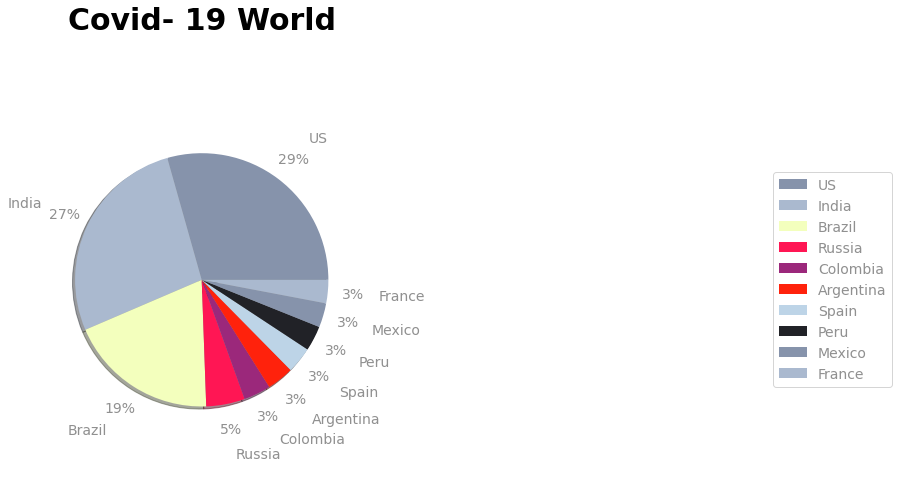

<Figure size 864x504 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize = (5,7))

plt.figure(figsize =(12, 7)) 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']= 14

color_palette_list = ['#8693AB','#AAB9CF', '#F3FFBD', '#FF1654', '#9B287B', '#FF220C', '#BDD4E7', '#212227', '#637074',   
                       '#FF3622']

c_name = ['US','India','Brazil','Russia','Colombia','Argentina', 'Spain','Peru', 'Mexico','France']

ax.pie(Top10_country, labels=c_name,  
       colors=color_palette_list[0:8], autopct='%1.0f%%', 
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Covid- 19 World",fontsize = 30, pad = 60, fontweight ="bold")
ax.legend(frameon=True, bbox_to_anchor=(3,0.8))



### Visualizing the Top 10 countries in the form of barplot for easy understanding

Text(0.5, 0, 'Country')

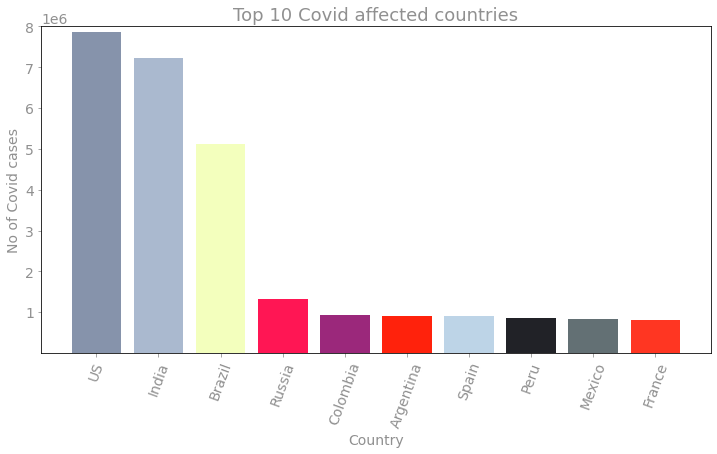

In [11]:
fig, ax = plt.subplots(figsize = (12,6))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']= 15
color_palette_list = ['#8693AB','#AAB9CF', '#F3FFBD', '#FF1654', '#9B287B', '#FF220C', '#BDD4E7', '#212227', '#637074',   
                       '#FF3622']
c_name = ['US','India','Brazil','Russia','Colombia','Argentina', 'Spain','Peru', 'Mexico','France']

n = 10
bars1 = ax.bar( c_name,Top10_country, 
        color = color_palette_list, 
        label='Bar graph of Covid 19')
ax.set_title("Top 10 Covid affected countries")
ax.set_ylabel("No of Covid cases")
ax.set_ylim((10000,8000000))
ax.set_xticks(range(10))
ax.set_xticklabels(c_name, rotation=70)
ax.set_xlabel("Country")

In [12]:
state = covid_india.groupby('Name of State / UT')['Total Confirmed cases'].sum()
state = state.to_frame()

### Finding out the Top 10 Covid-19 affected states in India

In [13]:
Top10_state = state['Total Confirmed cases'].nlargest(10)
Top10_state

Name of State / UT
Maharashtra       1543837
Andhra Pradesh     763573
Karnataka          726106
Tamil Nadu         665930
Uttar Pradesh      442118
Delhi              314224
Kerala             303896
West Bengal        302020
Odisha             256937
Telengana          216238
Name: Total Confirmed cases, dtype: int64

### Visualizing the Top 10 States of India in the form of pie chart

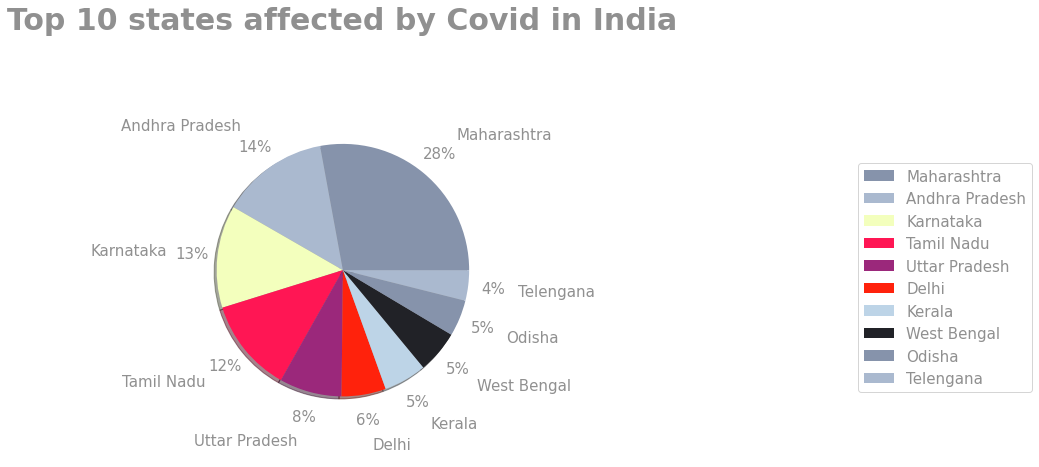

<Figure size 864x504 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize = (5,7))

plt.figure(figsize =(12, 7)) 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']= 15

color_palette_list = ['#8693AB','#AAB9CF', '#F3FFBD', '#FF1654', '#9B287B', '#FF220C', '#BDD4E7', '#212227', '#637074',   
                       '#FF3622']

s_name = ['Maharashtra','Andhra Pradesh','Karnataka', 'Tamil Nadu','Uttar Pradesh','Delhi','Kerala','West Bengal','Odisha','Telengana']

ax.pie(Top10_state, labels=s_name,  
       colors=color_palette_list[0:8], autopct='%1.0f%%', 
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Top 10 states affected by Covid in India",fontsize = 30, pad = 50, fontweight ="bold")
ax.legend(frameon=True, bbox_to_anchor=(3,0.8))



### Plotting the Top 10 Covid-19 affected states of India by using Plotly

In [15]:
label = ['Maharashtra','Andhra Pradesh','Karnataka', 'Tamil Nadu','Uttar Pradesh','Delhi','Kerala','West Bengal','Odisha','Telengana']

In [16]:
import plotly.express as px
fig = px.bar( x=label, y=Top10_state, title="Top 10 Covid-19 affected states of India",
            labels={'x':'State', 'y':'No of cases'})
fig.show()

In [17]:
data_recovered = recovered[['Country/Region','Lat', 'Long','10/11/20']]
data_recovered.shape

(254, 4)

In [18]:
temp = covid_19_data

### Visualizing COVID-19  Confirmed cases,Recovered and Deaths in India from February to May 2020

In [19]:
fig = go.Figure(data=[
go.Bar(name='Deaths', x=temp['Date'], y=temp['Deaths'],marker_color='#ff0000'),
go.Bar(name='Recovered Cases', x=temp['Date'], y=temp['Cured'],marker_color='#2bad57'),
go.Bar(name='Confirmed Cases', x=temp['Date'], y=temp['Confirmed'],marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='COVID-19 Cases,Recovery and Deaths in India from Feb till May',
                  plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [20]:
total_recovered = recovered_df['10/11/20'].sum(axis=0)
total_deaths = deaths_df['10/11/20'].sum(axis=0)
total_confirmed = confirmed_df['10/11/20'].sum(axis=0)
total_active = total_confirmed - (total_deaths + total_recovered)

### Mapping the Covid-19 Active, Recovered and Deaths across the world using pie chart

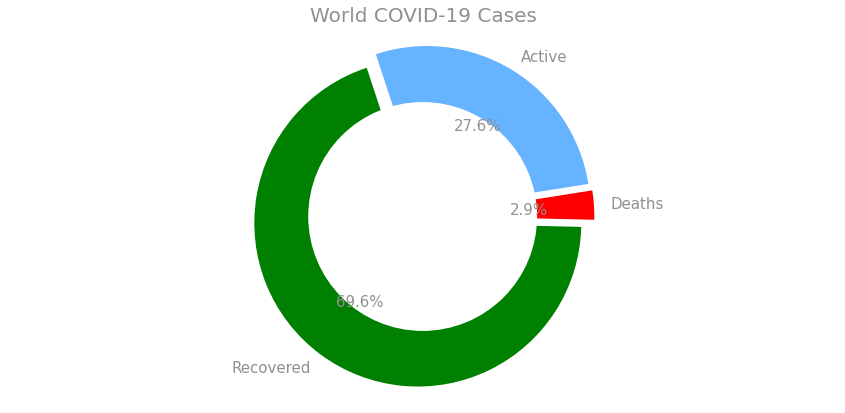

In [21]:
labels = ['Active','Recovered','Deaths']
sizes = [total_active,total_recovered,total_deaths]
color= ['#66b3ff','green','red']
explode = []


for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (12,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()


### Figuring out the commonly affected gender by Covid-19

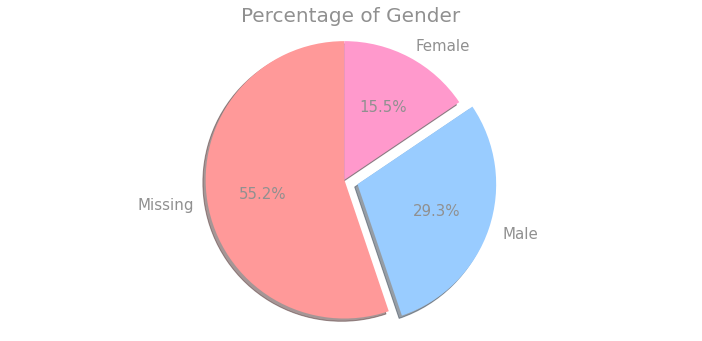

In [22]:
labels = ['Missing', 'Male', 'Female']
sizes = []
sizes.append(individual_details['Gender'].isnull().sum())
sizes.append(list(individual_details['Gender'].value_counts())[0])
sizes.append(list(individual_details['Gender'].value_counts())[1])

explode = (0, 0.1, 0)
colors = ['#ff9999','#99ccff','#ff99cc']

plt.figure(figsize= (10,5))
plt.title('Percentage of Gender',fontsize = 20)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.tight_layout()

#### Removing the missing values and separating the gender as male and female

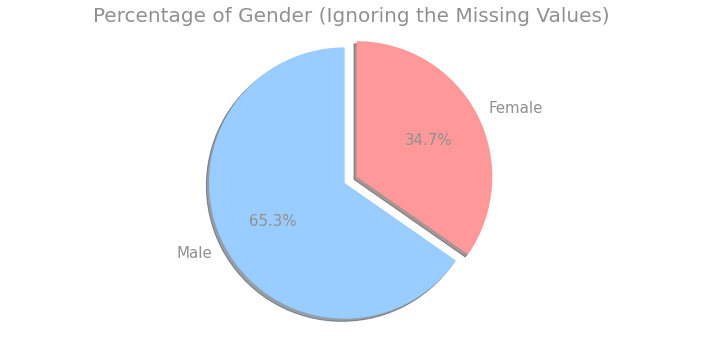

In [23]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['Gender'].value_counts())[0])
sizes.append(list(individual_details['Gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#99ccff','#ff9999']

plt.figure(figsize= (10,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()